## Covid-19 Outbreak Prediction using Logistic Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = pd.read_csv('covid_india.csv')
data = dataset.iloc[:,1:].values

Taking all the columns except serial number

In [5]:
data

array([['30/01/20', '6:00 PM', 'Kerala', ..., 0, 0, 1],
       ['31/01/20', '6:00 PM', 'Kerala', ..., 0, 0, 1],
       ['1/2/2020', '6:00 PM', 'Kerala', ..., 0, 0, 2],
       ...,
       ['2/9/2020', '8:00 AM', 'Uttarakhand', ..., 14076, 280, 20398],
       ['2/9/2020', '8:00 AM', 'Uttar Pradesh', ..., 176677, 3542,
        235757],
       ['2/9/2020', '8:00 AM', 'West Bengal', ..., 137616, 3283, 165721]],
      dtype=object)

In [51]:
data_dictionary_confirm = {}
for date in data:
    if date[0] in data_dictionary_confirm.keys():
        data_dictionary_confirm[date[0]] = data_dictionary_confirm[date[0]] + date[-2]
    else:
        data_dictionary_confirm[date[0]] = date[-2]


In [9]:
data_dictionary_confirm

{'30/01/20': 1,
 '31/01/20': 1,
 '1/2/2020': 2,
 '2/2/2020': 3,
 '3/2/2020': 3,
 '4/2/2020': 3,
 '5/2/2020': 3,
 '6/2/2020': 3,
 '7/2/2020': 3,
 '8/2/2020': 3,
 '9/2/2020': 3,
 '10/2/2020': 3,
 '11/2/2020': 3,
 '12/2/2020': 3,
 '13/02/20': 3,
 '14/02/20': 3,
 '15/02/20': 3,
 '16/02/20': 3,
 '17/02/20': 3,
 '18/02/20': 3,
 '19/02/20': 3,
 '20/02/20': 3,
 '21/02/20': 3,
 '22/02/20': 3,
 '23/02/20': 3,
 '24/02/20': 3,
 '25/02/20': 3,
 '26/02/20': 3,
 '27/02/20': 3,
 '28/02/20': 3,
 '29/02/20': 3,
 '1/3/2020': 3,
 '2/3/2020': 5,
 '3/3/2020': 6,
 '4/3/2020': 28,
 '5/3/2020': 30,
 '6/3/2020': 31,
 '7/3/2020': 34,
 '8/3/2020': 39,
 '9/3/2020': 46,
 '10/3/2020': 58,
 '11/3/2020': 60,
 '12/3/2020': 74,
 '13/03/20': 81,
 '14/03/20': 84,
 '15/03/20': 110,
 '16/03/20': 114,
 '17/03/20': 137,
 '18/03/20': 151,
 '19/03/20': 173,
 '20/03/20': 223,
 '21/03/20': 283,
 '22/03/20': 360,
 '23/03/20': 433,
 '24/03/20': 519,
 '25/03/20': 606,
 '26/03/20': 694,
 '27/03/20': 724,
 '28/03/20': 909,
 '29/03/20'

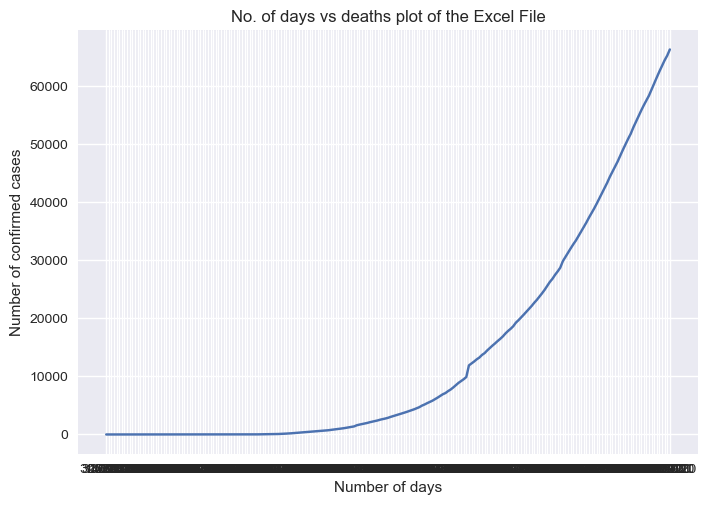

<Figure size 1000x1000 with 0 Axes>

In [52]:
fig, ax = plt.subplots()

ax.set_ylabel('Number of confirmed cases')
ax.set_xlabel('Number of days')

plt.figure(figsize=(10,10))
plt.style.use('seaborn')
ax.plot(data_dictionary_confirm.keys(), data_dictionary_confirm.values())
ax.set_title("No. of days vs deaths plot of the Excel File")
plt.show()


In [13]:
x_data = []
y_confirm_data = []

for key, value in data_dictionary_confirm.items():
    x_data.append(key)
    y_confirm_data.append(value)

In [14]:
x_data

['30/01/20',
 '31/01/20',
 '1/2/2020',
 '2/2/2020',
 '3/2/2020',
 '4/2/2020',
 '5/2/2020',
 '6/2/2020',
 '7/2/2020',
 '8/2/2020',
 '9/2/2020',
 '10/2/2020',
 '11/2/2020',
 '12/2/2020',
 '13/02/20',
 '14/02/20',
 '15/02/20',
 '16/02/20',
 '17/02/20',
 '18/02/20',
 '19/02/20',
 '20/02/20',
 '21/02/20',
 '22/02/20',
 '23/02/20',
 '24/02/20',
 '25/02/20',
 '26/02/20',
 '27/02/20',
 '28/02/20',
 '29/02/20',
 '1/3/2020',
 '2/3/2020',
 '3/3/2020',
 '4/3/2020',
 '5/3/2020',
 '6/3/2020',
 '7/3/2020',
 '8/3/2020',
 '9/3/2020',
 '10/3/2020',
 '11/3/2020',
 '12/3/2020',
 '13/03/20',
 '14/03/20',
 '15/03/20',
 '16/03/20',
 '17/03/20',
 '18/03/20',
 '19/03/20',
 '20/03/20',
 '21/03/20',
 '22/03/20',
 '23/03/20',
 '24/03/20',
 '25/03/20',
 '26/03/20',
 '27/03/20',
 '28/03/20',
 '29/03/20',
 '30/03/20',
 '31/03/20',
 '1/4/2020',
 '2/4/2020',
 '3/4/2020',
 '4/4/2020',
 '5/4/2020',
 '6/4/2020',
 '7/4/2020',
 '8/4/2020',
 '9/4/2020',
 '10/4/2020',
 '11/4/2020',
 '12/4/2020',
 '13/04/20',
 '14/04/20',
 '1

In [17]:
y_confirm_data

[1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 28,
 30,
 31,
 34,
 39,
 46,
 58,
 60,
 74,
 81,
 84,
 110,
 114,
 137,
 151,
 173,
 223,
 283,
 360,
 433,
 519,
 606,
 694,
 724,
 909,
 1024,
 1251,
 1397,
 1834,
 2069,
 2547,
 3072,
 3577,
 4281,
 4789,
 5274,
 5865,
 6761,
 7529,
 8447,
 9352,
 10815,
 11933,
 12759,
 13835,
 14792,
 16116,
 17656,
 18985,
 20471,
 21700,
 23452,
 24893,
 26605,
 28160,
 29834,
 31709,
 33330,
 34972,
 37157,
 40124,
 42836,
 46711,
 49391,
 52952,
 56342,
 59662,
 62939,
 67152,
 70756,
 74281,
 78003,
 81970,
 85710,
 90637,
 95759,
 100325,
 106750,
 112359,
 118447,
 125101,
 131868,
 138845,
 145380,
 151767,
 158333,
 165799,
 173763,
 182143,
 190535,
 198706,
 207615,
 216919,
 226770,
 236657,
 246628,
 256611,
 266598,
 276583,
 286579,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410461,
 425282,
 440215,
 456183,


In [18]:
x_train = []
for i in range(217):
    x_train.append(i)

x_train1 = np.array(x_train).reshape(-1, 1)
    

In [19]:
x_train1

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

Since the data is 2-dimensional, we converting 1D array to 2D array

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
poly = PolynomialFeatures(degree = 4, include_bias = False)
x_poly = poly.fit_transform(x_train1)

In [24]:
x_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01],
       ...,
       [1.00000000e+00, 2.14000000e+02, 4.57960000e+04, 9.80034400e+06,
        2.09727362e+09],
       [1.00000000e+00, 2.15000000e+02, 4.62250000e+04, 9.93837500e+06,
        2.13675062e+09],
       [1.00000000e+00, 2.16000000e+02, 4.66560000e+04, 1.00776960e+07,
        2.17678234e+09]])

In [42]:
y_confirm_train = np.array(y_confirm_data)
y_confirm_train

array([      1,       1,       2,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       6,      28,
            30,      31,      34,      39,      46,      58,      60,
            74,      81,      84,     110,     114,     137,     151,
           173,     223,     283,     360,     433,     519,     606,
           694,     724,     909,    1024,    1251,    1397,    1834,
          2069,    2547,    3072,    3577,    4281,    4789,    5274,
          5865,    6761,    7529,    8447,    9352,   10815,   11933,
         12759,   13835,   14792,   16116,   17656,   18985,   20471,
         21700,   23452,   24893,   26605,   28160,   29834,   31709,
         33330,   34972,   37157,   40124,   42836,   46711,   49391,
         52952,   56

In [46]:
model = LinearRegression()
poly.fit(x_poly, y_confirm_train)
model.fit(x_poly, y_confirm_train)

LinearRegression()

fit the parameters to the model

In [47]:
pred = model.predict(poly.fit_transform([[220]]))
print(f"The confirm cases on 220th day in India is: {pred}")

The confirm cases on 220th day in India is: [4369619.68078038]


## Covid-19 No. of Deaths Prediction

In [55]:
dict_data_deaths = {}

#calculate death per days
for date in data:
	if date[0] in dict_data_deaths.keys():
		dict_data_deaths[date[0]] = dict_data_deaths[date[0]] + date[-2]

	else:
		dict_data_deaths[date[0]] = date[-2]

y_death_data = []
for i in dict_data_deaths.values():
	y_death_data.append(i)

y_death_train = np.array(y_death_data)

#fit the paramters for death
poly.fit(x_poly, y_death_train)
model.fit(x_poly, y_death_train)


LinearRegression()

In [58]:

#prediction of no of death on 220th day
pred = model.predict(poly.fit_transform([[220]]))
print("The number of deaths on 220th day in india is: " + str(int(pred)))


The number of deaths on 220th day in india is: 73106


In [61]:
# dict_confirm_bengal = {}

# for date in data:
# 	if 'West Bengal' == date[2]:
# 		if date[0] in dict_confirm_bengal.keys():
# 			dict_confirm_bengal[date[0]] += date[-1]

# 		else:
# 			dict_confirm_bengal[date[0]] = date[-1]